In [89]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import datetime 
%matplotlib inline
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

In [90]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [91]:
print(data.columns)
print(data.shape)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)


0    284315
1       492
Name: Class, dtype: int64
정상거래의 비율 :  99.82725143693798
사기거래의 비율 :  0.1727485630620034


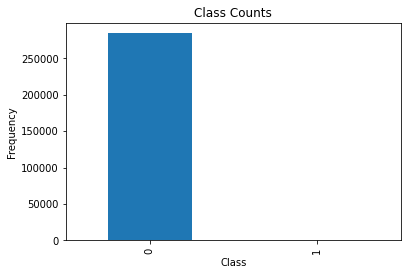

In [92]:
class_count = pd.value_counts(data['Class'], sort = True)
class_count.plot(kind = 'bar')
plt.title('Class Counts')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show

print(class_count)
Count_Normal = len(data[data['Class'] == 0])
Count_Fraud = len(data[data['Class'] == 1])
print('정상거래의 비율 : ', (Count_Normal/len(data))*100)
print('사기거래의 비율 : ', (Count_Fraud/len(data))*100)

<AxesSubplot:title={'center':'Normal'}, ylabel='Frequency'>

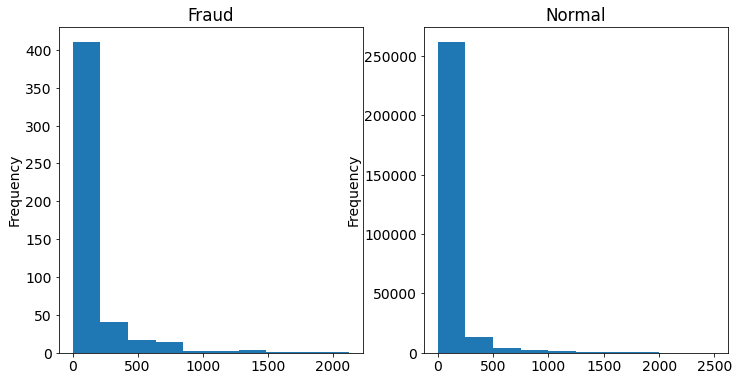

In [93]:
plt.rc('font', size=14)
Fraud  = data[data['Class'] == 1]
Normal =data[data['Class'] == 0]
plt.figure(figsize=(12,6))
plt.subplot(121)
Fraud[Fraud["Amount"]<= 2500].Amount.plot.hist(title="Fraud")
plt.subplot(122)
Normal[Normal["Amount"]<=2500].Amount.plot.hist(title="Normal")        

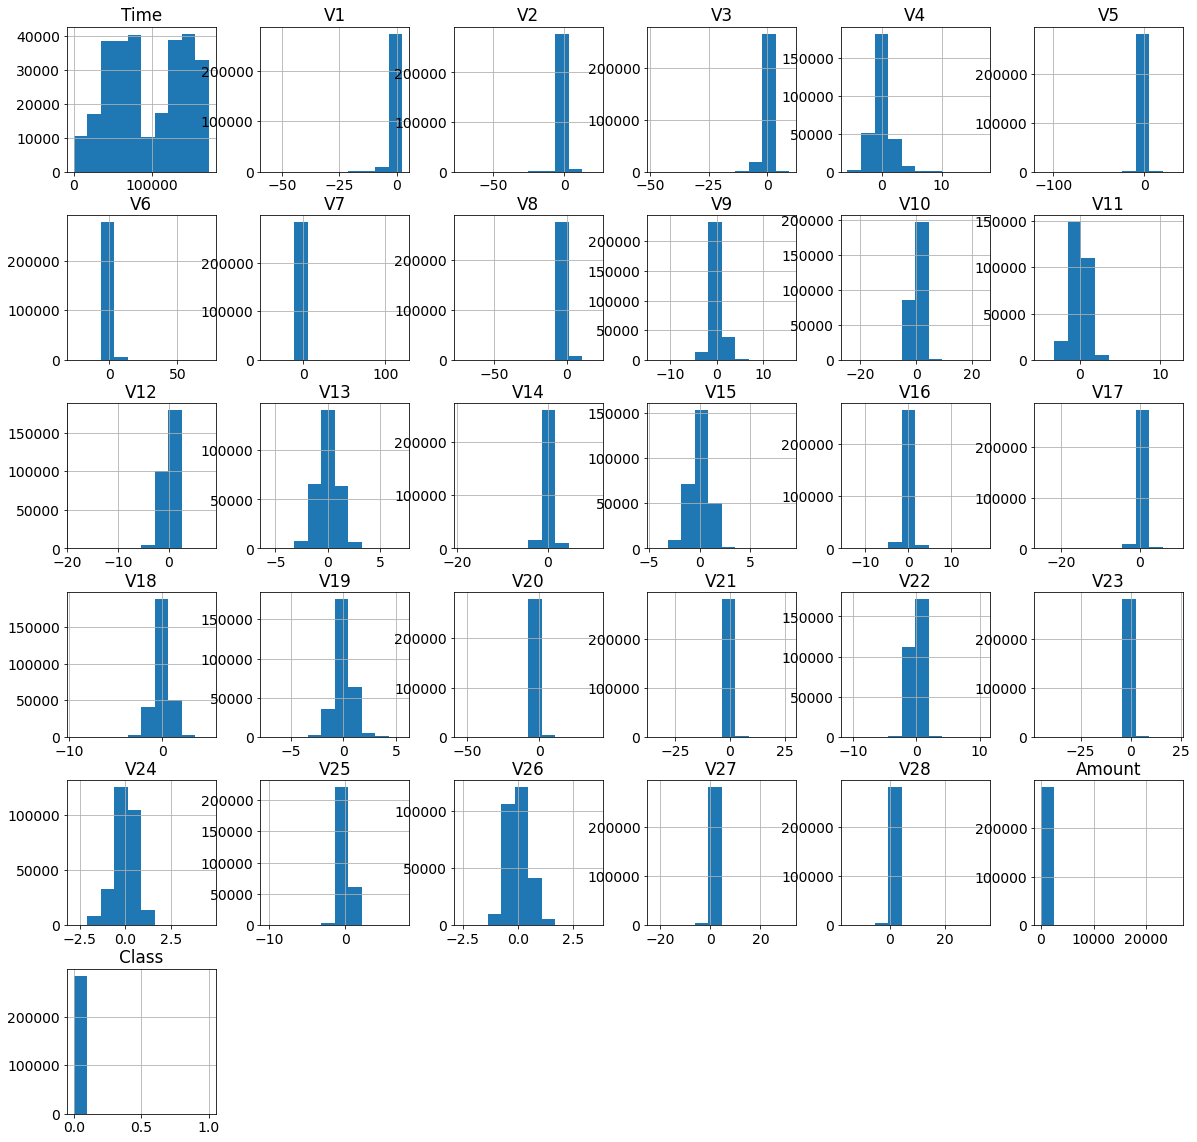

In [94]:
data.hist(figsize=(20,20))
plt.show()

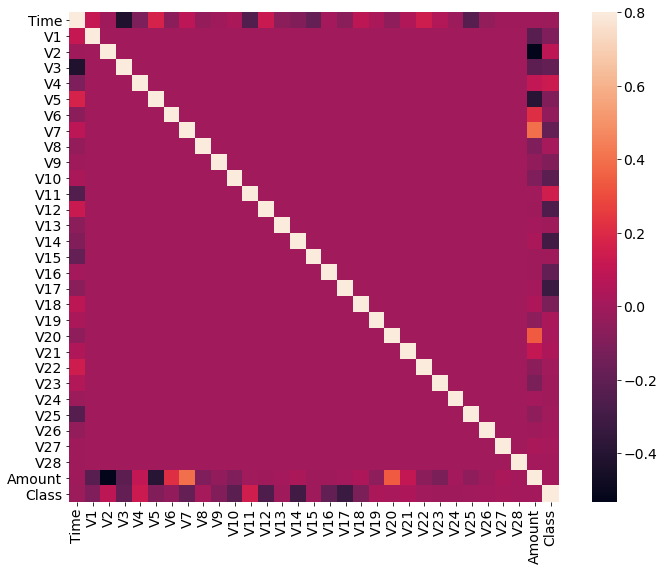

In [95]:
correlation_matrix = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [96]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform((data['Amount']).values.reshape(-1,1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [97]:
X = data.loc(axis=1)[data.columns != 'Class']
y = data.loc(axis=1)[ data.columns == 'Class']

In [98]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


In [99]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [100]:
#Under Sampling

numfraud = len(data[data['Class']==1])
fraud_idx = np.array((data[data['Class']==1]).index)
normal_idx = np.array((data[data['Class']==0]).index)

rand_normal_idx = np.array(np.random.choice(normal_idx, numfraud, replace =False))

under_sampling_idx = np.concatenate([fraud_idx, rand_normal_idx])
under_sampling = data.iloc[under_sampling_idx]

X_undersampled = under_sampling.loc(axis=1)[under_sampling.columns !='Class']
y_undersampled = under_sampling.loc(axis=1)[under_sampling.columns == 'Class']

print('%% normal :', (len(under_sampling[under_sampling.Class == 0]))/(len(under_sampling)))
print('%% normal :', (len(under_sampling[under_sampling.Class == 1]))/(len(under_sampling)))
print('Total number of transactions : ',len(under_sampling))


%% normal : 0.5
%% normal : 0.5
Total number of transactions :  984


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =123)

print(len(X_train),'//',len(X_test))

199364 // 85443


In [102]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled,
                                                                            test_size = 0.3, random_state =123)
print(len(X_train_under),'//',len(X_test_under))

688 // 296


In [190]:
model = LogisticRegression()
model.fit(X_train_under, y_train_under.values.ravel())
under_sample_prediction = model.predict(X_test_under.values)

In [191]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [192]:
accuracy_score(y_test_under, under_sample_prediction)

0.9358108108108109

In [193]:
print('Number of transaction: {} \naccuracy: {:.2f}%'.format(y_test_under.shape[0], 100*accuracy_score(y_test_under, under_sample_prediction)))
print('Precision: {:.2f}%\nRecall : {:.2f}% \nF1-score: {:.2f}%'.format(100*precision_score(y_test_under, under_sample_prediction),
                                                       100*recall_score(y_test_under, under_sample_prediction),
                                                       100*f1_score(y_test_under,under_sample_prediction)))

Number of transaction: 296 
accuracy: 93.58%
Precision: 96.58%
Recall : 90.97% 
F1-score: 93.69%


In [194]:
original_prediction = model.predict(X_test)

In [195]:
print('Number of transaction: {} \naccuracy: {:.2f}%'.format(y_test.shape[0], 100*accuracy_score(y_test, prediction)))
print('Precision: {:.2f}%\nRecall : {:.2f}% \nF1-score: {:.2f}%'.format(100*precision_score(y_test, prediction),
                                                       100*recall_score(y_test, prediction),
                                                       100*f1_score(y_test,prediction)))

Number of transaction: 85443 
accuracy: 96.49%
Precision: 4.75%
Recall : 93.12% 
F1-score: 9.04%


In [196]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Number of transaction: 296 // accuracy: 93.58%
Precision: 96.58% // Recall : 90.97% // F1-score: 93.69%


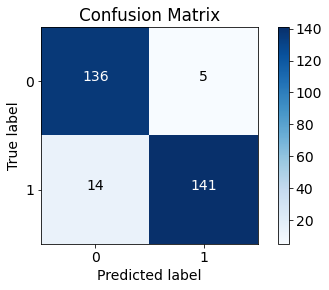

In [219]:
Lr = LogisticRegression()
y_pred_under_score = Lr.fit(X_train_under, y_train_under.values.ravel()).decision_function(X_test_under.values)
y_pred_under = Lr.predict(X_test_under.values)

fpr, tpr, thresholds = roc_curve(y_test_under.values.ravel(), y_pred_under_score)
roc_auc = auc(fpr,tpr)

cnf = confusion_matrix(y_test_under, y_pred_under)
np.set_printoptions(precision=2)

print('Number of transaction: {} // accuracy: {:.2f}%'.format(y_test_under.shape[0], 100*accuracy_score(y_test_under, y_pred_under)))
print('Precision: {:.2f}% // Recall : {:.2f}% // F1-score: {:.2f}%'.format(100*precision_score(y_test_under, y_pred_under),
                                                       100*recall_score(y_test_under, y_pred_under),
                                                       100*f1_score(y_test_under,y_pred_under)))

class_name = [0,1]
plt.figure()
plot_confusion_matrix(cnf, classes = class_name, title = 'Confusion Matrix')


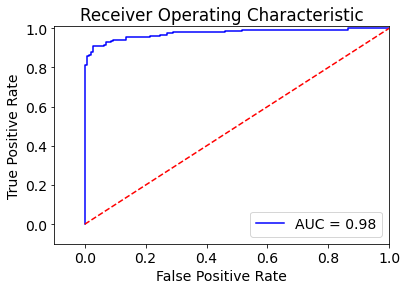

In [216]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Number of transaction: 85443 // accuracy: 96.49%
Precision: 4.75 // Recall : 93.12% // F1-score: 9.04%


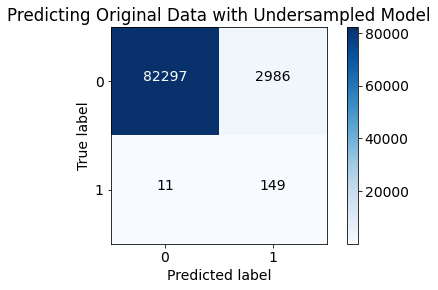

In [220]:
y_pred = Lr.predict(X_test.values)

cnf = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print('Number of transaction: {} // accuracy: {:.2f}%'.format(y_test.shape[0], 100*accuracy_score(y_test, y_pred)))
print('Precision: {:.2f} // Recall : {:.2f}% // F1-score: {:.2f}%'.format(100*precision_score(y_test, y_pred),
                                                       100*recall_score(y_test, y_pred),
                                                       100*f1_score(y_test,y_pred)))

class_name = [0,1]
plt.figure()
plot_confusion_matrix(cnf, classes = class_name, title = 'Predicting Original Data with Undersampled Model')


Number of transaction: 296 // accuracy: 99.90%
Precision: 83.33 // Recall : 59.38% // F1-score: 69.34%


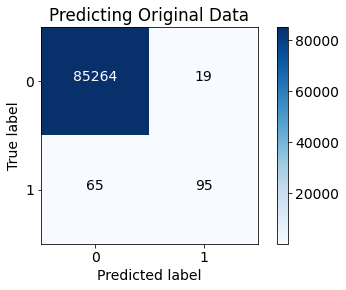

In [213]:
Lr = LogisticRegression()
y_pred_score = Lr.fit(X_train, y_train.values.ravel()).decision_function(X_test.values)
y_pred = Lr.predict(X_test.values)

fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred_score)
roc_auc = auc(fpr,tpr)

cnf = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print('Number of transaction: {} // accuracy: {:.2f}%'.format(y_test_under.shape[0], 100*accuracy_score(y_test, y_pred)))
print('Precision: {:.2f} // Recall : {:.2f}% // F1-score: {:.2f}%'.format(100*precision_score(y_test, y_pred),
                                                       100*recall_score(y_test, y_pred),
                                                       100*f1_score(y_test,y_pred)))

class_name = [0,1]
plt.figure()
plot_confusion_matrix(cnf, classes = class_name, title = 'Predicting Original Data')


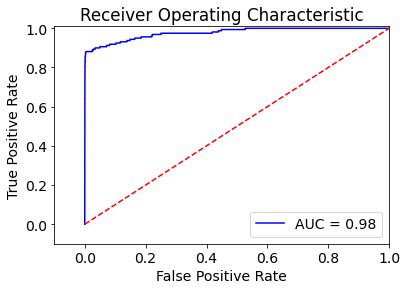

In [214]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

%% normal : 0.6666666666666666
%% fraud : 0.3333333333333333
Total number of transactions :  1476
1033 // 443
Number of transaction: 443 // accuracy: 94.58%
Precision: 95.68% // Recall : 88.08% // F1-score: 91.72%


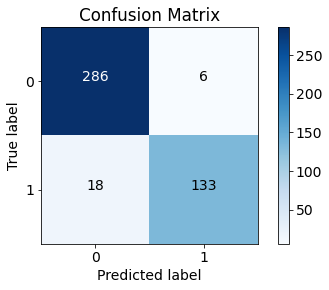

In [231]:
#Under Sampling

numfraud = len(data[data['Class']==1])
fraud_idx = np.array((data[data['Class']==1]).index)
normal_idx = np.array((data[data['Class']==0]).index)

rand_normal_idx = np.array(np.random.choice(normal_idx, 2 * numfraud, replace =False))

under_sampling_idx = np.concatenate([fraud_idx, rand_normal_idx])
under_sampling = data.iloc[under_sampling_idx]

X_undersampled = under_sampling.loc(axis=1)[under_sampling.columns !='Class']
y_undersampled = under_sampling.loc(axis=1)[under_sampling.columns == 'Class']

print('%% normal :', (len(under_sampling[under_sampling.Class == 0]))/(len(under_sampling)))
print('%% fraud :', (len(under_sampling[under_sampling.Class == 1]))/(len(under_sampling)))
print('Total number of transactions : ',len(under_sampling))

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled,
                                                                            test_size = 0.3, random_state =123)
print(len(X_train_under),'//',len(X_test_under))

Lr = LogisticRegression()
y_pred_under_score = Lr.fit(X_train_under, y_train_under.values.ravel()).decision_function(X_test_under.values)
y_pred_under = Lr.predict(X_test_under.values)

fpr, tpr, thresholds = roc_curve(y_test_under.values.ravel(), y_pred_under_score)
roc_auc = auc(fpr,tpr)

cnf = confusion_matrix(y_test_under, y_pred_under)
np.set_printoptions(precision=2)

print('Number of transaction: {} // accuracy: {:.2f}%'.format(y_test_under.shape[0], 100*accuracy_score(y_test_under, y_pred_under)))
print('Precision: {:.2f}% // Recall : {:.2f}% // F1-score: {:.2f}%'.format(100*precision_score(y_test_under, y_pred_under),
                                                       100*recall_score(y_test_under, y_pred_under),
                                                       100*f1_score(y_test_under,y_pred_under)))

class_name = [0,1]
plt.figure()
plot_confusion_matrix(cnf, classes = class_name, title = 'Confusion Matrix')


%% normal : 0.75
%% fraud : 0.25
Total number of transactions :  1968
1377 // 591
Number of transaction: 591 // accuracy: 96.45%
Precision: 95.00% // Recall : 90.48% // F1-score: 92.68%


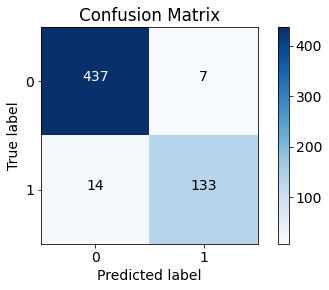

In [232]:
#Under Sampling

numfraud = len(data[data['Class']==1])
fraud_idx = np.array((data[data['Class']==1]).index)
normal_idx = np.array((data[data['Class']==0]).index)

rand_normal_idx = np.array(np.random.choice(normal_idx, 3 * numfraud, replace =False))

under_sampling_idx = np.concatenate([fraud_idx, rand_normal_idx])
under_sampling = data.iloc[under_sampling_idx]

X_undersampled = under_sampling.loc(axis=1)[under_sampling.columns !='Class']
y_undersampled = under_sampling.loc(axis=1)[under_sampling.columns == 'Class']

print('%% normal :', (len(under_sampling[under_sampling.Class == 0]))/(len(under_sampling)))
print('%% fraud :', (len(under_sampling[under_sampling.Class == 1]))/(len(under_sampling)))
print('Total number of transactions : ',len(under_sampling))

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled,
                                                                            test_size = 0.3, random_state =123)
print(len(X_train_under),'//',len(X_test_under))

Lr = LogisticRegression()
y_pred_under_score = Lr.fit(X_train_under, y_train_under.values.ravel()).decision_function(X_test_under.values)
y_pred_under = Lr.predict(X_test_under.values)

fpr, tpr, thresholds = roc_curve(y_test_under.values.ravel(), y_pred_under_score)
roc_auc = auc(fpr,tpr)

cnf = confusion_matrix(y_test_under, y_pred_under)
np.set_printoptions(precision=2)

print('Number of transaction: {} // accuracy: {:.2f}%'.format(y_test_under.shape[0], 100*accuracy_score(y_test_under, y_pred_under)))
print('Precision: {:.2f}% // Recall : {:.2f}% // F1-score: {:.2f}%'.format(100*precision_score(y_test_under, y_pred_under),
                                                       100*recall_score(y_test_under, y_pred_under),
                                                       100*f1_score(y_test_under,y_pred_under)))

class_name = [0,1]
plt.figure()
plot_confusion_matrix(cnf, classes = class_name, title = 'Confusion Matrix')


%% normal : 0.8
%% normal : 0.2
Total number of transactions :  2460
1722 // 738
Number of transaction: 738 // accuracy: 97.70%
Precision: 97.48% // Recall : 89.23% // F1-score: 93.17%


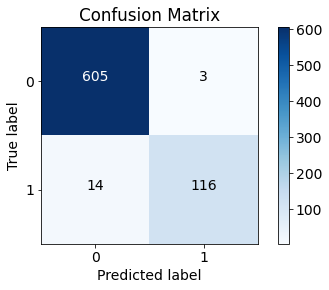

In [228]:
#Under Sampling

numfraud = len(data[data['Class']==1])
fraud_idx = np.array((data[data['Class']==1]).index)
normal_idx = np.array((data[data['Class']==0]).index)

rand_normal_idx = np.array(np.random.choice(normal_idx, 4 * numfraud, replace =False))

under_sampling_idx = np.concatenate([fraud_idx, rand_normal_idx])
under_sampling = data.iloc[under_sampling_idx]

X_undersampled = under_sampling.loc(axis=1)[under_sampling.columns !='Class']
y_undersampled = under_sampling.loc(axis=1)[under_sampling.columns == 'Class']

print('%% normal :', (len(under_sampling[under_sampling.Class == 0]))/(len(under_sampling)))
print('%% normal :', (len(under_sampling[under_sampling.Class == 1]))/(len(under_sampling)))
print('Total number of transactions : ',len(under_sampling))

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled,
                                                                            test_size = 0.3, random_state =123)
print(len(X_train_under),'//',len(X_test_under))

Lr = LogisticRegression()
y_pred_under_score = Lr.fit(X_train_under, y_train_under.values.ravel()).decision_function(X_test_under.values)
y_pred_under = Lr.predict(X_test_under.values)

fpr, tpr, thresholds = roc_curve(y_test_under.values.ravel(), y_pred_under_score)
roc_auc = auc(fpr,tpr)

cnf = confusion_matrix(y_test_under, y_pred_under)
np.set_printoptions(precision=2)

print('Number of transaction: {} // accuracy: {:.2f}%'.format(y_test_under.shape[0], 100*accuracy_score(y_test_under, y_pred_under)))
print('Precision: {:.2f}% // Recall : {:.2f}% // F1-score: {:.2f}%'.format(100*precision_score(y_test_under, y_pred_under),
                                                       100*recall_score(y_test_under, y_pred_under),
                                                       100*f1_score(y_test_under,y_pred_under)))

class_name = [0,1]
plt.figure()
plot_confusion_matrix(cnf, classes = class_name, title = 'Confusion Matrix')


%% normal : 0.8333333333333334
%% fraud : 0.16666666666666666
Total number of transactions :  2952
2066 // 886
Number of transaction: 886 // accuracy: 98.08%
Precision: 96.90% // Recall : 90.58% // F1-score: 93.63%


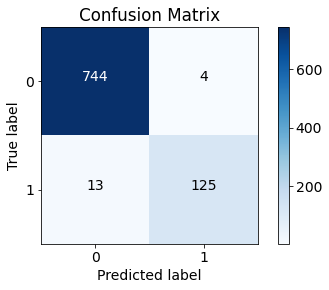

In [233]:
#Under Sampling

numfraud = len(data[data['Class']==1])
fraud_idx = np.array((data[data['Class']==1]).index)
normal_idx = np.array((data[data['Class']==0]).index)

rand_normal_idx = np.array(np.random.choice(normal_idx, 5 * numfraud, replace =False))

under_sampling_idx = np.concatenate([fraud_idx, rand_normal_idx])
under_sampling = data.iloc[under_sampling_idx]

X_undersampled = under_sampling.loc(axis=1)[under_sampling.columns !='Class']
y_undersampled = under_sampling.loc(axis=1)[under_sampling.columns == 'Class']

print('%% normal :', (len(under_sampling[under_sampling.Class == 0]))/(len(under_sampling)))
print('%% fraud :', (len(under_sampling[under_sampling.Class == 1]))/(len(under_sampling)))
print('Total number of transactions : ',len(under_sampling))

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled,
                                                                            test_size = 0.3, random_state =123)
print(len(X_train_under),'//',len(X_test_under))

Lr = LogisticRegression()
y_pred_under_score = Lr.fit(X_train_under, y_train_under.values.ravel()).decision_function(X_test_under.values)
y_pred_under = Lr.predict(X_test_under.values)

fpr, tpr, thresholds = roc_curve(y_test_under.values.ravel(), y_pred_under_score)
roc_auc = auc(fpr,tpr)

cnf = confusion_matrix(y_test_under, y_pred_under)
np.set_printoptions(precision=2)

print('Number of transaction: {} // accuracy: {:.2f}%'.format(y_test_under.shape[0], 100*accuracy_score(y_test_under, y_pred_under)))
print('Precision: {:.2f}% // Recall : {:.2f}% // F1-score: {:.2f}%'.format(100*precision_score(y_test_under, y_pred_under),
                                                       100*recall_score(y_test_under, y_pred_under),
                                                       100*f1_score(y_test_under,y_pred_under)))

class_name = [0,1]
plt.figure()
plot_confusion_matrix(cnf, classes = class_name, title = 'Confusion Matrix')


%% normal : 0.8571428571428571
%% fraud : 0.14285714285714285
Total number of transactions :  3444
2410 // 1034
Number of transaction: 1034 // accuracy: 98.84%
Precision: 96.88% // Recall : 93.94% // F1-score: 95.38%


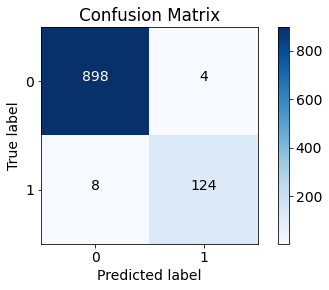

In [234]:
#Under Sampling

numfraud = len(data[data['Class']==1])
fraud_idx = np.array((data[data['Class']==1]).index)
normal_idx = np.array((data[data['Class']==0]).index)

rand_normal_idx = np.array(np.random.choice(normal_idx, 6 * numfraud, replace =False))

under_sampling_idx = np.concatenate([fraud_idx, rand_normal_idx])
under_sampling = data.iloc[under_sampling_idx]

X_undersampled = under_sampling.loc(axis=1)[under_sampling.columns !='Class']
y_undersampled = under_sampling.loc(axis=1)[under_sampling.columns == 'Class']

print('%% normal :', (len(under_sampling[under_sampling.Class == 0]))/(len(under_sampling)))
print('%% fraud :', (len(under_sampling[under_sampling.Class == 1]))/(len(under_sampling)))
print('Total number of transactions : ',len(under_sampling))

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled,
                                                                            test_size = 0.3, random_state =123)
print(len(X_train_under),'//',len(X_test_under))

Lr = LogisticRegression()
y_pred_under_score = Lr.fit(X_train_under, y_train_under.values.ravel()).decision_function(X_test_under.values)
y_pred_under = Lr.predict(X_test_under.values)

fpr, tpr, thresholds = roc_curve(y_test_under.values.ravel(), y_pred_under_score)
roc_auc = auc(fpr,tpr)

cnf = confusion_matrix(y_test_under, y_pred_under)
np.set_printoptions(precision=2)

print('Number of transaction: {} // accuracy: {:.2f}%'.format(y_test_under.shape[0], 100*accuracy_score(y_test_under, y_pred_under)))
print('Precision: {:.2f}% // Recall : {:.2f}% // F1-score: {:.2f}%'.format(100*precision_score(y_test_under, y_pred_under),
                                                       100*recall_score(y_test_under, y_pred_under),
                                                       100*f1_score(y_test_under,y_pred_under)))

class_name = [0,1]
plt.figure()
plot_confusion_matrix(cnf, classes = class_name, title = 'Confusion Matrix')


%% normal : 0.5
%% fraud : 0.5
Total number of transactions :  984
688 // 296
Number of transaction: 85443 // accuracy: 96.53%
Precision: 4.77% // Recall : 92.50% // F1-score: 9.07%


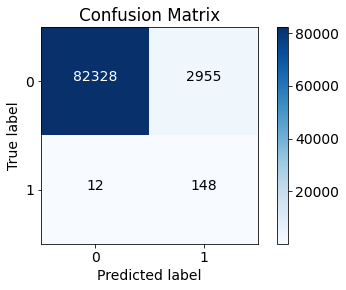

In [236]:
#Under Sampling

numfraud = len(data[data['Class']==1])
fraud_idx = np.array((data[data['Class']==1]).index)
normal_idx = np.array((data[data['Class']==0]).index)

rand_normal_idx = np.array(np.random.choice(normal_idx, 1 * numfraud, replace =False))

under_sampling_idx = np.concatenate([fraud_idx, rand_normal_idx])
under_sampling = data.iloc[under_sampling_idx]

X_undersampled = under_sampling.loc(axis=1)[under_sampling.columns !='Class']
y_undersampled = under_sampling.loc(axis=1)[under_sampling.columns == 'Class']

print('%% normal :', (len(under_sampling[under_sampling.Class == 0]))/(len(under_sampling)))
print('%% fraud :', (len(under_sampling[under_sampling.Class == 1]))/(len(under_sampling)))
print('Total number of transactions : ',len(under_sampling))

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled,
                                                                            test_size = 0.3, random_state =123)
print(len(X_train_under),'//',len(X_test_under))

Lr = LogisticRegression()
Lr.fit(X_train_under, y_train_under.values.ravel()).decision_function(X_test_under.values)
y_pred = Lr.predict(X_test.values)

cnf = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print('Number of transaction: {} // accuracy: {:.2f}%'.format(y_test.shape[0], 100*accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}% // Recall : {:.2f}% // F1-score: {:.2f}%'.format(100*precision_score(y_test, y_pred),
                                                       100*recall_score(y_test, y_pred),
                                                       100*f1_score(y_test,y_pred)))

class_name = [0,1]
plt.figure()
plot_confusion_matrix(cnf, classes = class_name, title = 'Confusion Matrix')


%% normal : 0.6666666666666666
%% fraud : 0.3333333333333333
Total number of transactions :  1476
1033 // 443
Number of transaction: 85443 // accuracy: 98.53%
Precision: 10.45% // Recall : 90.62% // F1-score: 18.73%


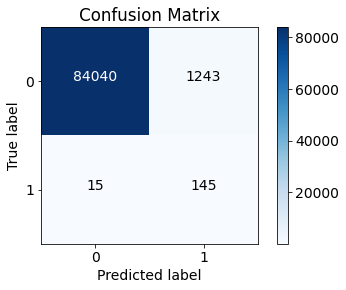

In [237]:
#Under Sampling

numfraud = len(data[data['Class']==1])
fraud_idx = np.array((data[data['Class']==1]).index)
normal_idx = np.array((data[data['Class']==0]).index)

rand_normal_idx = np.array(np.random.choice(normal_idx, 2 * numfraud, replace =False))

under_sampling_idx = np.concatenate([fraud_idx, rand_normal_idx])
under_sampling = data.iloc[under_sampling_idx]

X_undersampled = under_sampling.loc(axis=1)[under_sampling.columns !='Class']
y_undersampled = under_sampling.loc(axis=1)[under_sampling.columns == 'Class']

print('%% normal :', (len(under_sampling[under_sampling.Class == 0]))/(len(under_sampling)))
print('%% fraud :', (len(under_sampling[under_sampling.Class == 1]))/(len(under_sampling)))
print('Total number of transactions : ',len(under_sampling))

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled,
                                                                            test_size = 0.3, random_state =123)
print(len(X_train_under),'//',len(X_test_under))

Lr = LogisticRegression()
Lr.fit(X_train_under, y_train_under.values.ravel()).decision_function(X_test_under.values)
y_pred = Lr.predict(X_test.values)

cnf = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print('Number of transaction: {} // accuracy: {:.2f}%'.format(y_test.shape[0], 100*accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}% // Recall : {:.2f}% // F1-score: {:.2f}%'.format(100*precision_score(y_test, y_pred),
                                                       100*recall_score(y_test, y_pred),
                                                       100*f1_score(y_test,y_pred)))

class_name = [0,1]
plt.figure()
plot_confusion_matrix(cnf, classes = class_name, title = 'Confusion Matrix')


%% normal : 0.75
%% fraud : 0.25
Total number of transactions :  1968
1377 // 591
Number of transaction: 85443 // accuracy: 98.59%
Precision: 10.89% // Recall : 91.25% // F1-score: 19.45%


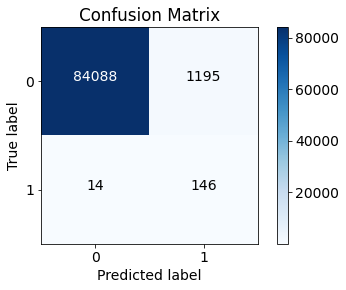

In [238]:
#Under Sampling

numfraud = len(data[data['Class']==1])
fraud_idx = np.array((data[data['Class']==1]).index)
normal_idx = np.array((data[data['Class']==0]).index)

rand_normal_idx = np.array(np.random.choice(normal_idx, 3 * numfraud, replace =False))

under_sampling_idx = np.concatenate([fraud_idx, rand_normal_idx])
under_sampling = data.iloc[under_sampling_idx]

X_undersampled = under_sampling.loc(axis=1)[under_sampling.columns !='Class']
y_undersampled = under_sampling.loc(axis=1)[under_sampling.columns == 'Class']

print('%% normal :', (len(under_sampling[under_sampling.Class == 0]))/(len(under_sampling)))
print('%% fraud :', (len(under_sampling[under_sampling.Class == 1]))/(len(under_sampling)))
print('Total number of transactions : ',len(under_sampling))

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled,
                                                                            test_size = 0.3, random_state =123)
print(len(X_train_under),'//',len(X_test_under))

Lr = LogisticRegression()
Lr.fit(X_train_under, y_train_under.values.ravel()).decision_function(X_test_under.values)
y_pred = Lr.predict(X_test.values)

cnf = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print('Number of transaction: {} // accuracy: {:.2f}%'.format(y_test.shape[0], 100*accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}% // Recall : {:.2f}% // F1-score: {:.2f}%'.format(100*precision_score(y_test, y_pred),
                                                       100*recall_score(y_test, y_pred),
                                                       100*f1_score(y_test,y_pred)))

class_name = [0,1]
plt.figure()
plot_confusion_matrix(cnf, classes = class_name, title = 'Confusion Matrix')


%% normal : 0.8
%% fraud : 0.2
Total number of transactions :  2460
1722 // 738
Number of transaction: 85443 // accuracy: 99.14%
Precision: 16.57% // Recall : 88.75% // F1-score: 27.93%


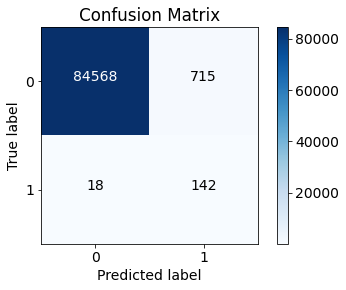

In [239]:
#Under Sampling

numfraud = len(data[data['Class']==1])
fraud_idx = np.array((data[data['Class']==1]).index)
normal_idx = np.array((data[data['Class']==0]).index)

rand_normal_idx = np.array(np.random.choice(normal_idx, 4 * numfraud, replace =False))

under_sampling_idx = np.concatenate([fraud_idx, rand_normal_idx])
under_sampling = data.iloc[under_sampling_idx]

X_undersampled = under_sampling.loc(axis=1)[under_sampling.columns !='Class']
y_undersampled = under_sampling.loc(axis=1)[under_sampling.columns == 'Class']

print('%% normal :', (len(under_sampling[under_sampling.Class == 0]))/(len(under_sampling)))
print('%% fraud :', (len(under_sampling[under_sampling.Class == 1]))/(len(under_sampling)))
print('Total number of transactions : ',len(under_sampling))

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled,
                                                                            test_size = 0.3, random_state =123)
print(len(X_train_under),'//',len(X_test_under))

Lr = LogisticRegression()
Lr.fit(X_train_under, y_train_under.values.ravel()).decision_function(X_test_under.values)
y_pred = Lr.predict(X_test.values)

cnf = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print('Number of transaction: {} // accuracy: {:.2f}%'.format(y_test.shape[0], 100*accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}% // Recall : {:.2f}% // F1-score: {:.2f}%'.format(100*precision_score(y_test, y_pred),
                                                       100*recall_score(y_test, y_pred),
                                                       100*f1_score(y_test,y_pred)))

class_name = [0,1]
plt.figure()
plot_confusion_matrix(cnf, classes = class_name, title = 'Confusion Matrix')


%% normal : 0.8333333333333334
%% fraud : 0.16666666666666666
Total number of transactions :  2952
2066 // 886
Number of transaction: 85443 // accuracy: 99.36%
Precision: 21.13% // Recall : 88.75% // F1-score: 34.13%


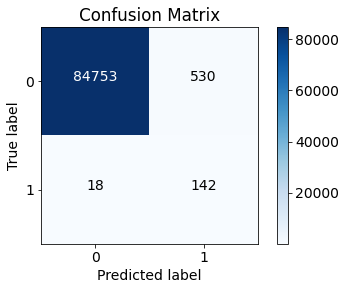

In [240]:
#Under Sampling

numfraud = len(data[data['Class']==1])
fraud_idx = np.array((data[data['Class']==1]).index)
normal_idx = np.array((data[data['Class']==0]).index)

rand_normal_idx = np.array(np.random.choice(normal_idx, 5 * numfraud, replace =False))

under_sampling_idx = np.concatenate([fraud_idx, rand_normal_idx])
under_sampling = data.iloc[under_sampling_idx]

X_undersampled = under_sampling.loc(axis=1)[under_sampling.columns !='Class']
y_undersampled = under_sampling.loc(axis=1)[under_sampling.columns == 'Class']

print('%% normal :', (len(under_sampling[under_sampling.Class == 0]))/(len(under_sampling)))
print('%% fraud :', (len(under_sampling[under_sampling.Class == 1]))/(len(under_sampling)))
print('Total number of transactions : ',len(under_sampling))

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled,
                                                                            test_size = 0.3, random_state =123)
print(len(X_train_under),'//',len(X_test_under))

Lr = LogisticRegression()
Lr.fit(X_train_under, y_train_under.values.ravel()).decision_function(X_test_under.values)
y_pred = Lr.predict(X_test.values)

cnf = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print('Number of transaction: {} // accuracy: {:.2f}%'.format(y_test.shape[0], 100*accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}% // Recall : {:.2f}% // F1-score: {:.2f}%'.format(100*precision_score(y_test, y_pred),
                                                       100*recall_score(y_test, y_pred),
                                                       100*f1_score(y_test,y_pred)))

class_name = [0,1]
plt.figure()
plot_confusion_matrix(cnf, classes = class_name, title = 'Confusion Matrix')


%% normal : 0.8571428571428571
%% fraud : 0.14285714285714285
Total number of transactions :  3444
2410 // 1034
Number of transaction: 85443 // accuracy: 99.36%
Precision: 21.25% // Recall : 89.38% // F1-score: 34.33%


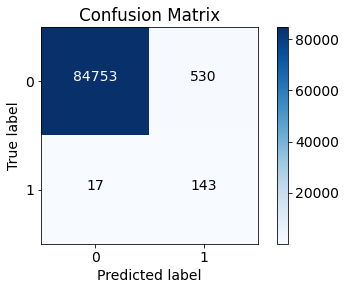

In [241]:
#Under Sampling

numfraud = len(data[data['Class']==1])
fraud_idx = np.array((data[data['Class']==1]).index)
normal_idx = np.array((data[data['Class']==0]).index)

rand_normal_idx = np.array(np.random.choice(normal_idx, 6 * numfraud, replace =False))

under_sampling_idx = np.concatenate([fraud_idx, rand_normal_idx])
under_sampling = data.iloc[under_sampling_idx]

X_undersampled = under_sampling.loc(axis=1)[under_sampling.columns !='Class']
y_undersampled = under_sampling.loc(axis=1)[under_sampling.columns == 'Class']

print('%% normal :', (len(under_sampling[under_sampling.Class == 0]))/(len(under_sampling)))
print('%% fraud :', (len(under_sampling[under_sampling.Class == 1]))/(len(under_sampling)))
print('Total number of transactions : ',len(under_sampling))

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled,
                                                                            test_size = 0.3, random_state =123)
print(len(X_train_under),'//',len(X_test_under))

Lr = LogisticRegression()
Lr.fit(X_train_under, y_train_under.values.ravel()).decision_function(X_test_under.values)
y_pred = Lr.predict(X_test.values)

cnf = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print('Number of transaction: {} // accuracy: {:.2f}%'.format(y_test.shape[0], 100*accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}% // Recall : {:.2f}% // F1-score: {:.2f}%'.format(100*precision_score(y_test, y_pred),
                                                       100*recall_score(y_test, y_pred),
                                                       100*f1_score(y_test,y_pred)))

class_name = [0,1]
plt.figure()
plot_confusion_matrix(cnf, classes = class_name, title = 'Confusion Matrix')


%% normal : 0.5
%% fraud : 0.5
Total number of transactions :  984
688 // 296
Number of transaction: 296 // accuracy: 92.57%
Precision: 96.50% // Recall : 89.03% // F1-score: 92.62%


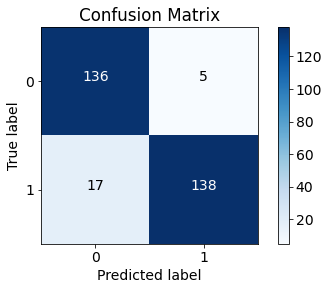

In [244]:
#Under Sampling And Under Sample Test

numfraud = len(data[data['Class']==1])
fraud_idx = np.array((data[data['Class']==1]).index)
normal_idx = np.array((data[data['Class']==0]).index)

rand_normal_idx = np.array(np.random.choice(normal_idx, 1 * numfraud, replace =False))

under_sampling_idx = np.concatenate([fraud_idx, rand_normal_idx])
under_sampling = data.iloc[under_sampling_idx]

X_undersampled = under_sampling.loc(axis=1)[under_sampling.columns !='Class']
y_undersampled = under_sampling.loc(axis=1)[under_sampling.columns == 'Class']

print('%% normal :', (len(under_sampling[under_sampling.Class == 0]))/(len(under_sampling)))
print('%% fraud :', (len(under_sampling[under_sampling.Class == 1]))/(len(under_sampling)))
print('Total number of transactions : ',len(under_sampling))

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled,
                                                                            test_size = 0.3, random_state =123)
print(len(X_train_under),'//',len(X_test_under))

Rf = RandomForestClassifier()
y_pred_under_score = Rf.fit(X_train_under, y_train_under.values.ravel())
y_pred_under = Rf.predict(X_test_under.values)

cnf = confusion_matrix(y_test_under, y_pred_under)
np.set_printoptions(precision=2)

print('Number of transaction: {} // accuracy: {:.2f}%'.format(y_test_under.shape[0], 100*accuracy_score(y_test_under, y_pred_under)))
print('Precision: {:.2f}% // Recall : {:.2f}% // F1-score: {:.2f}%'.format(100*precision_score(y_test_under, y_pred_under),
                                                       100*recall_score(y_test_under, y_pred_under),
                                                       100*f1_score(y_test_under,y_pred_under)))

class_name = [0,1]
plt.figure()
plot_confusion_matrix(cnf, classes = class_name, title = 'Confusion Matrix')


1
%% normal : 0.5
%% fraud : 0.5
Total number of transactions :  984
688 // 296
Number of transaction: 296 // accuracy: 92.91%
Precision: 98.55% // Recall : 87.74% // F1-score: 92.83%
2
%% normal : 0.6666666666666666
%% fraud : 0.3333333333333333
Total number of transactions :  1476
1033 // 443
Number of transaction: 443 // accuracy: 94.58%
Precision: 97.04% // Recall : 86.75% // F1-score: 91.61%
3
%% normal : 0.75
%% fraud : 0.25
Total number of transactions :  1968
1377 // 591
Number of transaction: 591 // accuracy: 96.95%
Precision: 99.24% // Recall : 88.44% // F1-score: 93.53%
4
%% normal : 0.8
%% fraud : 0.2
Total number of transactions :  2460
1722 // 738
Number of transaction: 738 // accuracy: 97.56%
Precision: 98.28% // Recall : 87.69% // F1-score: 92.68%
5
%% normal : 0.8333333333333334
%% fraud : 0.16666666666666666
Total number of transactions :  2952
2066 // 886
Number of transaction: 886 // accuracy: 98.08%
Precision: 96.90% // Recall : 90.58% // F1-score: 93.63%


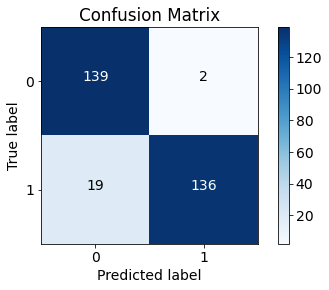

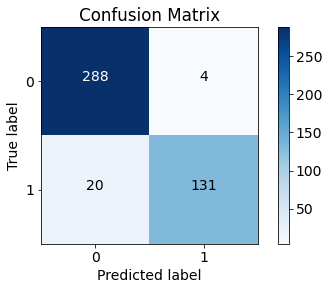

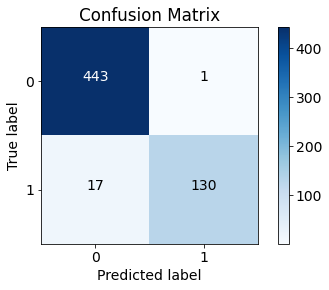

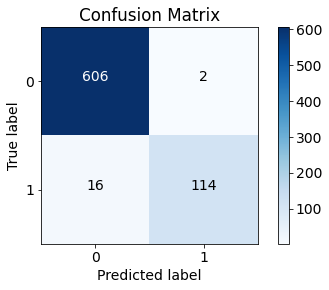

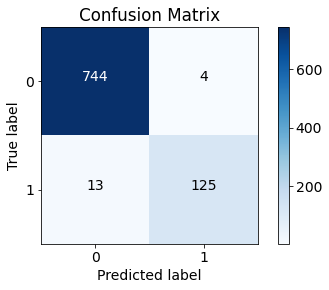

In [253]:
#Under Sampling And Under Sample Test

numfraud = len(data[data['Class']==1])
fraud_idx = np.array((data[data['Class']==1]).index)
normal_idx = np.array((data[data['Class']==0]).index)

for i in range(1,6):
    print(i)
    rand_normal_idx = np.array(np.random.choice(normal_idx, i * numfraud, replace =False))

    under_sampling_idx = np.concatenate([fraud_idx, rand_normal_idx])
    under_sampling = data.iloc[under_sampling_idx]

    X_undersampled = under_sampling.loc(axis=1)[under_sampling.columns !='Class']
    y_undersampled = under_sampling.loc(axis=1)[under_sampling.columns == 'Class']

    print('%% normal :', (len(under_sampling[under_sampling.Class == 0]))/(len(under_sampling)))
    print('%% fraud :', (len(under_sampling[under_sampling.Class == 1]))/(len(under_sampling)))
    print('Total number of transactions : ',len(under_sampling))

    X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled,
                                                                                test_size = 0.3, random_state =123)
    print(len(X_train_under),'//',len(X_test_under))

    Rf = RandomForestClassifier(random_state =123)
    y_pred_under_score = Rf.fit(X_train_under, y_train_under.values.ravel())
    y_pred_under = Rf.predict(X_test_under.values)

    cnf = confusion_matrix(y_test_under, y_pred_under)
    np.set_printoptions(precision=2)

    print('Number of transaction: {} // accuracy: {:.2f}%'.format(y_test_under.shape[0], 100*accuracy_score(y_test_under, y_pred_under)))
    print('Precision: {:.2f}% // Recall : {:.2f}% // F1-score: {:.2f}%'.format(100*precision_score(y_test_under, y_pred_under),
                                                           100*recall_score(y_test_under, y_pred_under),
                                                           100*f1_score(y_test_under,y_pred_under)))

    class_name = [0,1]
    plt.figure()
    plot_confusion_matrix(cnf, classes = class_name, title = 'Confusion Matrix')


1
%% normal : 0.5
%% fraud : 0.5
Total number of transactions :  984
688 // 296
Number of transaction: 296 // accuracy: 98.53%
Precision: 11.13% // Recall : 98.12% // F1-score: 19.99%
2
%% normal : 0.6666666666666666
%% fraud : 0.3333333333333333
Total number of transactions :  1476
1033 // 443
Number of transaction: 443 // accuracy: 99.43%
Precision: 24.41% // Recall : 96.88% // F1-score: 38.99%
3
%% normal : 0.75
%% fraud : 0.25
Total number of transactions :  1968
1377 // 591
Number of transaction: 591 // accuracy: 99.35%
Precision: 21.86% // Recall : 96.88% // F1-score: 35.67%
4
%% normal : 0.8
%% fraud : 0.2
Total number of transactions :  2460
1722 // 738
Number of transaction: 738 // accuracy: 99.70%
Precision: 37.86% // Recall : 97.50% // F1-score: 54.55%
5
%% normal : 0.8333333333333334
%% fraud : 0.16666666666666666
Total number of transactions :  2952
2066 // 886
Number of transaction: 886 // accuracy: 99.65%
Precision: 34.58% // Recall : 98.12% // F1-score: 51.14%


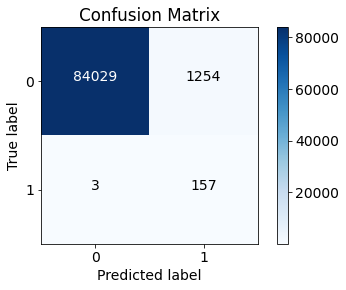

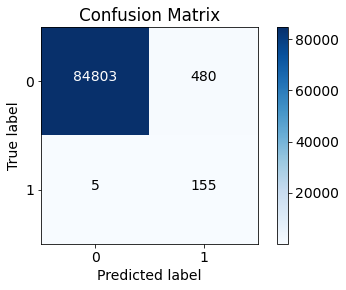

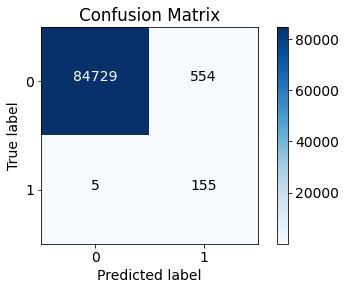

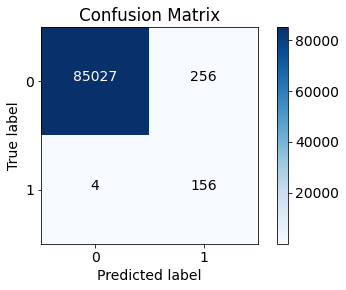

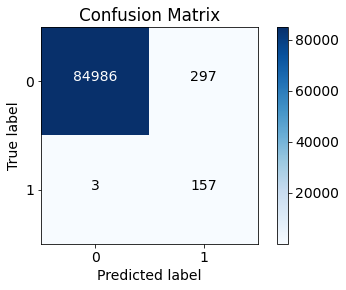

In [254]:
#Under Sampling And Under Sample Test

numfraud = len(data[data['Class']==1])
fraud_idx = np.array((data[data['Class']==1]).index)
normal_idx = np.array((data[data['Class']==0]).index)

for i in range(1,6):
    print(i)
    rand_normal_idx = np.array(np.random.choice(normal_idx, i * numfraud, replace =False))

    under_sampling_idx = np.concatenate([fraud_idx, rand_normal_idx])
    under_sampling = data.iloc[under_sampling_idx]

    X_undersampled = under_sampling.loc(axis=1)[under_sampling.columns !='Class']
    y_undersampled = under_sampling.loc(axis=1)[under_sampling.columns == 'Class']

    print('%% normal :', (len(under_sampling[under_sampling.Class == 0]))/(len(under_sampling)))
    print('%% fraud :', (len(under_sampling[under_sampling.Class == 1]))/(len(under_sampling)))
    print('Total number of transactions : ',len(under_sampling))

    X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled,
                                                                                test_size = 0.3, random_state =123)
    print(len(X_train_under),'//',len(X_test_under))

    Rf = RandomForestClassifier(random_state =123)
    y_pred_under_score = Rf.fit(X_train_under, y_train_under.values.ravel())
    y_pred = Rf.predict(X_test.values)

    cnf = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    print('Number of transaction: {} // accuracy: {:.2f}%'.format(y_test_under.shape[0], 100*accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}% // Recall : {:.2f}% // F1-score: {:.2f}%'.format(100*precision_score(y_test, y_pred),
                                                           100*recall_score(y_test, y_pred),
                                                           100*f1_score(y_test,y_pred)))

    class_name = [0,1]
    plt.figure()
    plot_confusion_matrix(cnf, classes = class_name, title = 'Confusion Matrix')
